In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [11]:
dataset=pd.read_csv("C://Users//kipal//Downloads//loan_data_set.csv")

In [12]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
dataset.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
261,LP001868,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban,Y
544,LP002757,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
485,LP002544,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,NaN,Rural,Y
163,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
465,LP002494,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
33,LP001098,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban,Y


In [15]:
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
dataset.shape

(614, 13)

In [18]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
dataset.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [20]:
list(dataset.Gender.unique())

['Male', 'Female', nan]

In [21]:
list(dataset.Married.unique())


['No', 'Yes', nan]

In [22]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
dataset['Gender']= dataset['Gender'].fillna(dataset ['Gender'].mode() .values[0])
dataset['Married']= dataset['Married'].fillna(dataset ['Married'].mode() .values[0])
dataset['Dependents']= dataset['Dependents'].fillna(dataset ['Dependents'].mode() .values[0])
dataset['Self_Employed']= dataset['Self_Employed'].fillna(dataset ['Self_Employed'].mode() .values[0])
dataset['LoanAmount']= dataset['LoanAmount'].fillna(dataset ['LoanAmount'].mode() .values[0])


In [24]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
dataset['Loan_Amount_Term']= dataset['Loan_Amount_Term'].fillna(dataset ['Loan_Amount_Term'].mode() .values[0])
dataset['Credit_History']= dataset['Credit_History'].fillna(dataset ['Credit_History'].mode() .values[0])

In [26]:
dataset.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
dataset.drop('Loan_ID', axis= 1, inplace=True)

In [28]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Gender
Male      502
Female    112
Name: count, dtype: int64

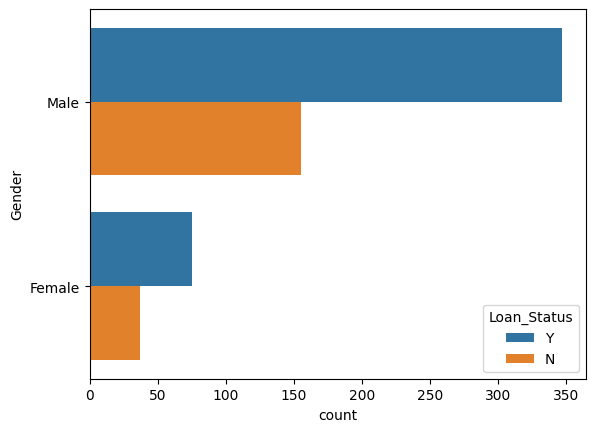

In [29]:
sns.countplot(y='Gender', hue='Loan_Status', data=dataset)
dataset['Gender'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

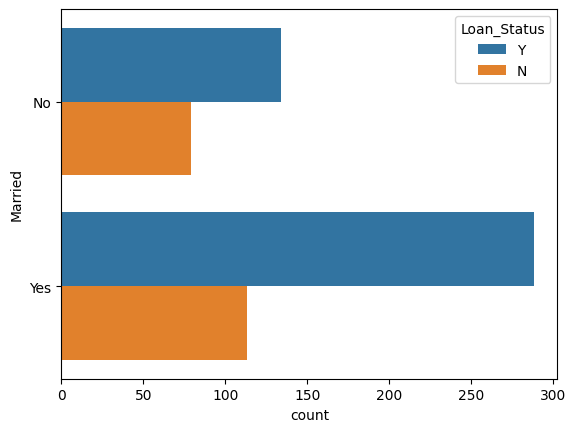

In [30]:
sns.countplot(y='Married', hue='Loan_Status', data=dataset)
dataset['Married'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

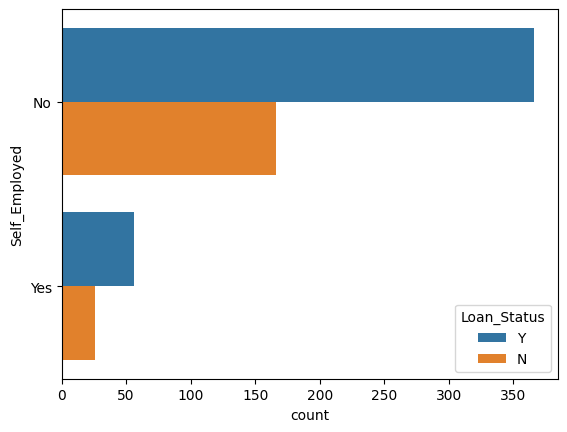

In [31]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data=dataset)
dataset['Self_Employed'].value_counts()

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [33]:
gender= {"Female": 0,  "Male": 1} 
dataset['Gender']= dataset['Gender'].replace(gender)



C:\Users\kipal\AppData\Local\Temp\ipykernel_13876\2252765154.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender']= dataset['Gender'].replace(gender)


In [34]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
married= {"No": 0,  "Yes": 1} 
dataset['Married']= dataset['Married'].replace(married)

C:\Users\kipal\AppData\Local\Temp\ipykernel_13876\966815213.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Married']= dataset['Married'].replace(married)


In [36]:
education= {"Graduate": 0,  "Not Graduate": 1} 
dataset['Education']= dataset['Education'].replace(education)

C:\Users\kipal\AppData\Local\Temp\ipykernel_13876\2127144313.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Education']= dataset['Education'].replace(education)


In [37]:
self_employed= {"No": 0,  "Yes": 1} 
dataset['Self_Employed']= dataset['Self_Employed'].replace(self_employed)

C:\Users\kipal\AppData\Local\Temp\ipykernel_13876\734756375.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Self_Employed']= dataset['Self_Employed'].replace(self_employed)


In [38]:
dataset.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
372,1,1,2,0,1,9323,7873.0,380.0,300.0,1.0,Rural,Y
516,0,1,2,0,0,2031,1632.0,113.0,480.0,1.0,Semiurban,Y
487,1,1,1,0,0,18333,0.0,500.0,360.0,1.0,Urban,N
427,1,1,2,0,0,5935,0.0,133.0,360.0,1.0,Semiurban,Y
287,1,1,0,0,0,3704,2000.0,120.0,360.0,1.0,Rural,Y
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
122,0,0,0,0,0,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
48,0,1,0,0,0,2645,3440.0,120.0,360.0,0.0,Urban,N
7,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
536,1,1,0,0,0,6133,3906.0,324.0,360.0,1.0,Urban,Y


In [39]:
property_area= {"Urban": 0,  "Semiurban": 1, "Rural": 2} 
dataset['Property_Area']= dataset['Property_Area'].replace(property_area)

C:\Users\kipal\AppData\Local\Temp\ipykernel_13876\1493663940.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Property_Area']= dataset['Property_Area'].replace(property_area)


In [40]:
dataset.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
524,1,0,0,0,0,4680,2087.0,120.0,360.0,1.0,1,N
165,1,1,0,0,0,3707,3166.0,182.0,360.0,1.0,2,Y
605,1,1,0,1,0,2400,3800.0,120.0,180.0,1.0,0,N
471,1,1,1,1,0,2653,1500.0,113.0,180.0,0.0,2,N
575,1,1,2,0,0,3159,461.0,108.0,84.0,1.0,0,Y
309,1,1,2,1,0,7667,0.0,185.0,360.0,1.0,2,Y
362,1,1,0,0,0,4750,2333.0,130.0,360.0,1.0,0,Y
142,1,0,0,0,1,6950,0.0,175.0,180.0,1.0,1,Y
27,1,1,2,1,0,4226,1040.0,110.0,360.0,1.0,0,Y
208,1,0,0,0,0,2479,0.0,59.0,360.0,1.0,0,Y


In [41]:
loan_status= {"N": 0,  "Y": 1} 
dataset['Loan_Status']= dataset['Loan_Status'].replace(loan_status)

C:\Users\kipal\AppData\Local\Temp\ipykernel_13876\1864050211.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Loan_Status']= dataset['Loan_Status'].replace(loan_status)


In [42]:
dataset.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
481,1,1,3+,1,0,3095,0.0,113.0,360.0,1.0,2,1
137,1,1,2,0,1,3316,3500.0,88.0,360.0,1.0,0,1
74,1,1,3+,0,1,5266,1774.0,187.0,360.0,1.0,1,1
138,1,0,0,0,0,14999,0.0,242.0,360.0,0.0,1,0
52,0,0,0,0,0,4230,0.0,112.0,360.0,1.0,1,0


In [43]:
y = dataset["Loan_Status"]


In [63]:
y_target = dataset.drop("Loan_Status", axis=1)
train = dataset.drop(columns=["Loan_Status"])


In [64]:
X_train, X_test, y_train, y_test = train_test_split( train, target, test_size=0.20)

In [65]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 

In [66]:
model_1.fit(X_train, y_target)
model_2.fit(X_train, y_target)
model_3.fit(X_train, y_target)

ValueError: Found input variables with inconsistent numbers of samples: [491, 614]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Define the mapping for 'Dependents' column
dependents_mapping = {'0': 0, '1': 1, '3+': 2}

# Apply the mapping to the 'Dependents' column
dataset['Dependents'] = dataset['Dependents'].astype(str)  # Ensure values are strings
dataset['Dependents'] = dataset['Dependents'].replace(dependents_mapping)

# Any other necessary preprocessing steps for other categorical variables
# For example, you can apply Label Encoding on other non-numeric columns
label_encoder = LabelEncoder()
# Assuming 'Gender' is another categorical column
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Split the dataset into features (X) and target (y)
X = dataset.drop('Loan_Status', axis=1)  # Features
y = dataset['Loan_Status']               # Target (labels)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the value of n_neighbors

# Fit the model
knn.fit(x_train, y_train)

# Make predictions on the test set
prediction_knn = knn.predict(x_test)

# Output the predictions
print('Prediction for test set: {}'.format(prediction_knn))


Prediction for test set: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 0 0 0 1]


In [ ]:
a= pd.DataFrame({'actualvalue': y_test, 'predictedvalue': prediction_knn})
a.head()

In [81]:
from sklearn import metrics

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
matrix= confusion_matrix(y_test, prediction_knn)

              precision    recall  f1-score   support

           0       0.24      0.09      0.13        43
           1       0.63      0.84      0.72        80

    accuracy                           0.58       123
   macro avg       0.43      0.47      0.43       123
weighted avg       0.49      0.58      0.52       123



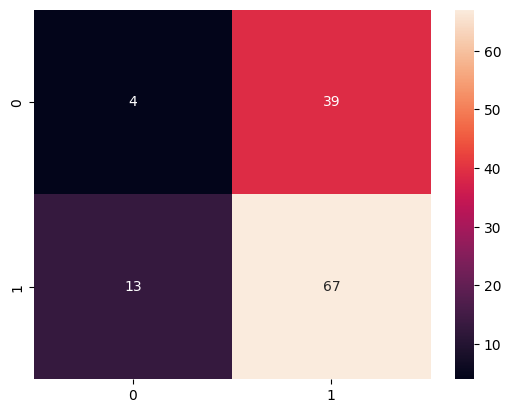

In [84]:
sns.heatmap(matrix, annot=True , fmt="d")
print(classification_report(y_test, prediction_knn))